<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Classification Art Category</title>
    <style>
        body {
            margin: 0;
            padding: 0;
            display: flex;
            flex-direction: column;
            align-items: center;
            background-color: #000;
            color: white;
        }
        h1 {
            font-size: 5em;
            font-weight: bold;
            text-align: center;
        }
    </style>
</head>
<body>
    <h1>Classification Art Category</h1>
</body>
</html>

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Sommaire - Classification Art</title>
    <style>
        body {
            margin: 0;
            padding: 0;
            display: flex;
            flex-direction: column;
            justify-content: center;
            align-items: center;
            height: 100vh;
            background-color: #000;
            color: white;
            font-family: Arial, sans-serif;
        }
        h1 {
            font-weight: bold;
            text-align: center;
            margin-bottom: 20px;
            font-size: 3em;
        }
        ul {
            list-style-type: none;
            text-align: center;
            font-size: 2em;
            line-height: 2em;
            margin: 0;
            padding: 0;
        }
    </style>
</head>
<body>
    <h1>Sommaire</h1>
    <ul>
        <li>1. Présentation de la base de données</li>
        <li>2. DataLoader et Data Augmentation</li>
        <li>3. Reseau FC</li>
        <li>4. Reseau CNN</li>
        <li>5. Transfer Learning</li>
    </ul>
</body>
</html>

In [1]:
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import layers
import artlib
import os

NUM_CLASSES = 13
INPUT_SHAPE = (224,224)
INPUT_SHAPE_CNN = (128,128)
BATCH_SIZE = 64
DATASET_PATH = 'dataset_600'

classes = [d for d in os.listdir(DATASET_PATH) if os.path.isdir(os.path.join(DATASET_PATH, d))]
classes

['Academic_Art',
 'Art_Nouveau',
 'Baroque',
 'Expressionism',
 'Japanese_Art',
 'Neoclassicism',
 'Primitivism',
 'Realism',
 'Renaissance',
 'Rococo',
 'Romanticism',
 'Symbolism',
 'Western_Medieval']

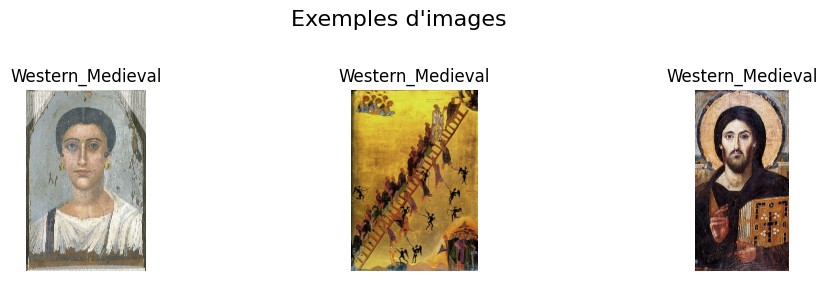

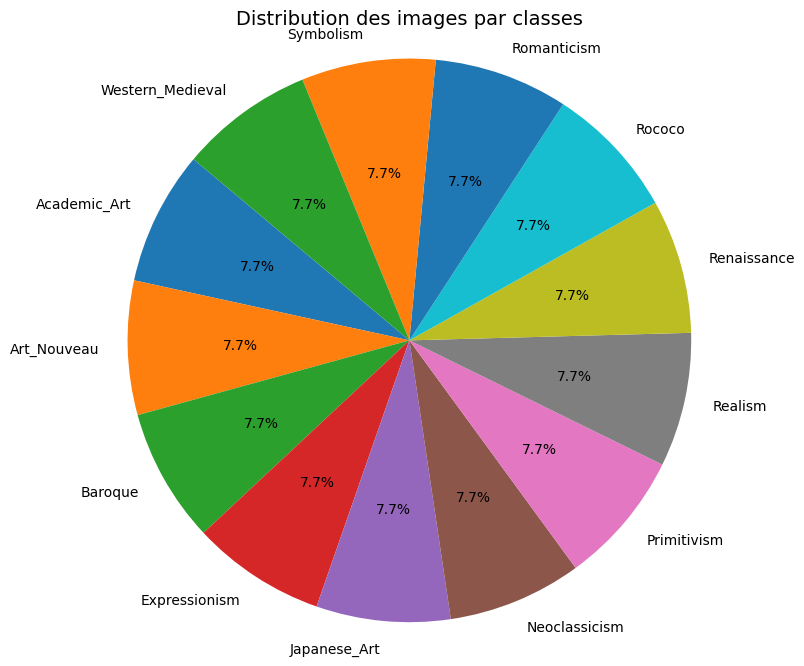

In [2]:
sample_images,class_counts = artlib.sample_images_class_count()
artlib.show_sample_images(sample_images)
artlib.plot_pie_chart(class_counts)

In [3]:
dataset_dictionnary = {"train":None,"valid":None,"train_data_augmentation":None}
dataset_dictionnary_cnn = {"train":None,"valid":None,"train_data_augmentation":None}

dataset_dictionnary["train"], dataset_dictionnary["valid"] = image_dataset_from_directory(
                        directory = DATASET_PATH,
                        batch_size=BATCH_SIZE,
                        image_size=INPUT_SHAPE,
                        validation_split=0.2,
                        subset='both',
                        seed = 14
            )

dataset_dictionnary_cnn["train"], dataset_dictionnary["valid"] = image_dataset_from_directory(
                        directory = DATASET_PATH,
                        batch_size=BATCH_SIZE,
                        image_size=INPUT_SHAPE_CNN,
                        validation_split=0.2,
                        subset='both',
                        seed = 14
            )

Found 7800 files belonging to 13 classes.
Using 6240 files for training.
Using 1560 files for validation.
Found 7800 files belonging to 13 classes.
Using 6240 files for training.
Using 1560 files for validation.


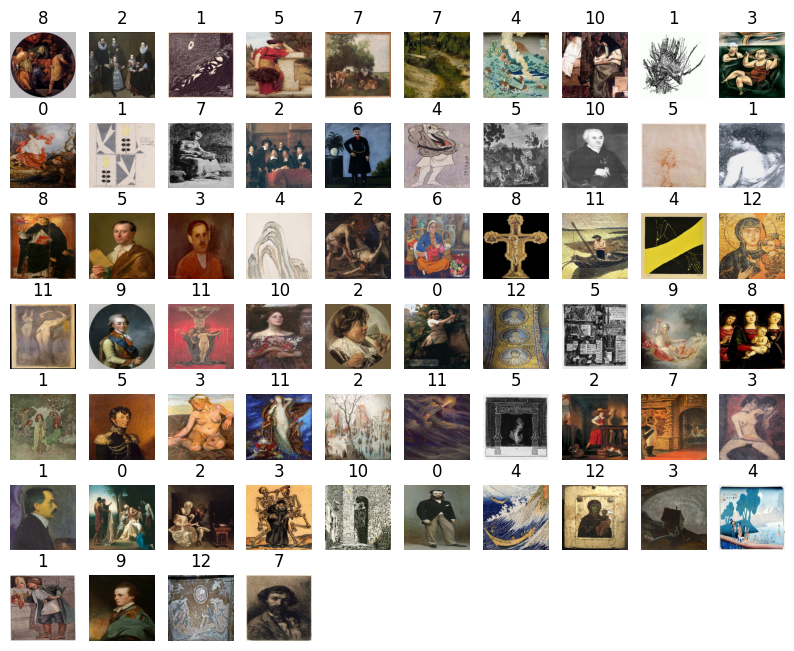

In [4]:
artlib.ShowSamples(dataset_dictionnary['train'])

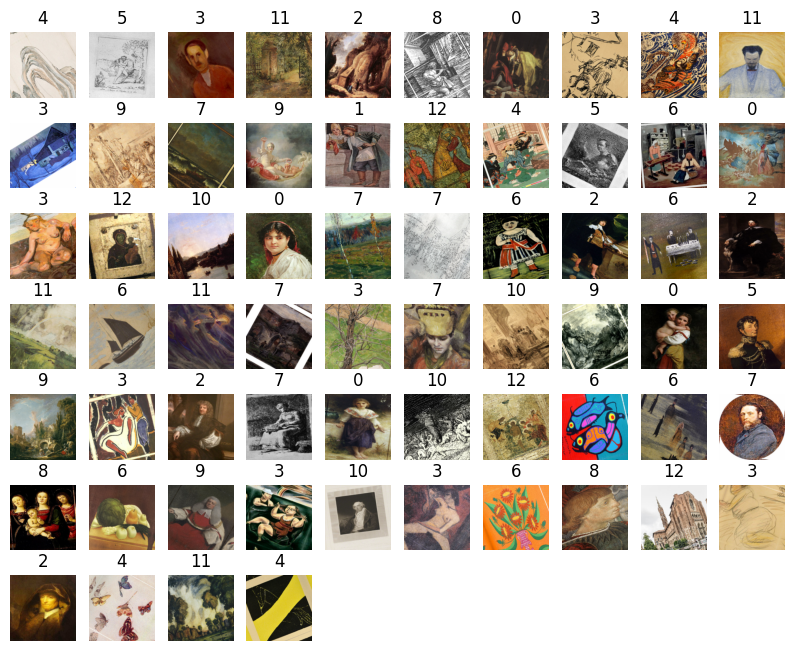

In [5]:
from artlib import dataset_augmentation

data_augmentation_layers = [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
dataset_dictionnary['train_data_augmentation'] = dataset_dictionnary['train'].map( lambda x, y: (dataset_augmentation(data_augmentation_layers,x), y))
dataset_dictionnary_cnn['train_data_augmentation'] = dataset_dictionnary_cnn['train'].map( lambda x, y: (dataset_augmentation(data_augmentation_layers,x), y))

artlib.ShowSamples(dataset_dictionnary['train_data_augmentation'])

# **Réseau - FC**

In [6]:
learning_rates = [0.01, 0.001, 0.0001]
epochs = [3]

print("✅ INPUT_SHAPE utilisé :", INPUT_SHAPE)
for x, y in dataset_dictionnary["train"].take(1):
    print("✅ Shape des entrées :", x.shape, "| Type :", x.dtype)

hyperparams = artlib.generate_hyperparameter_combinations(learning_rates,epochs)
df_results_fc, best_model_fc, best_history_fc = artlib.train_all_models(
    model_type="FC",
    hyperparams=hyperparams,
    dataset_dictionnary =dataset_dictionnary,
)

✅ INPUT_SHAPE utilisé : (224, 224)
✅ Shape des entrées : (64, 224, 224, 3) | Type : <dtype: 'float32'>
🔍 Entraînement avec les paramètres : {'epochs': 3, 'learning_rate': 0.01, 'dropout': True, 'data_augmentation': True}
🚀 Initialisation du modèle FC...
📊 Début de l'entraînement...
Epoch 1/3
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 652ms/step - accuracy: 0.0791 - loss: 18.1464

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 150528, but received input with shape (None, 49152)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 128, 128, 3), dtype=float32)
  • training=False
  • mask=None

In [ ]:

df_sorted_fc = df_results_fc.sort_values(by="final_val_accuracy", ascending=False)
df_sorted_fc

In [ ]:
# ⚡ Afficher les performances du modèle sur chaque classe
artlib.plot_class_performance(best_model_fc, dataset_dictionnary["valid"], classes)

# 📊 Afficher la courbe d'apprentissage
artlib.plot_learning_curve(best_history_fc)

# **Réseau - CNN**

In [ ]:
# learning_rates = [0.01, 0.001, 0.0001]
# epochs = [5]

# hyperparams = artlib.generate_hyperparameter_combinations(learning_rates,epochs)
# df_results_cnn, best_model_cnn, best_history_cnn = artlib.train_all_models(
#     model_type="CNN",
#     hyperparams=hyperparams,
#     dataset_dictionnary =dataset_dictionnary_cnn,
# )

In [ ]:
# df_sorted_cnn = df_results_cnn.sort_values(by="final_val_accuracy", ascending=False)
# df_sorted_cnn

In [ ]:
# # ⚡ Afficher les performances du modèle sur chaque classe
# artlib.plot_class_performance(best_model_cnn, dataset_dictionnary_cnn["valid"], classes)

# # 📊 Afficher la courbe d'apprentissage
# artlib.plot_learning_curve(best_history_cnn)

# **Réseau - TF**

In [ ]:
# learning_rates = [0.01, 0.001, 0.0001]
# epochs = [3]

# hyperparams = artlib.generate_hyperparameter_combinations(learning_rates,epochs)
# df_results_tf, best_model_tf, best_history_tf = artlib.train_all_models(
#     model_type="TF",
#     hyperparams=hyperparams,
#     dataset_dictionnary =dataset_dictionnary,
# )

In [ ]:
# df_sorted_tf = df_results_tf.sort_values(by="final_val_accuracy", ascending=False)
# df_sorted_tf

In [ ]:
# # ⚡ Afficher les performances du modèle sur chaque classe
# artlib.plot_class_performance(best_model_tf, dataset_dictionnary["valid"], classes)

# # 📊 Afficher la courbe d'apprentissage
# artlib.plot_learning_curve(best_history_tf)